In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
flower_mapping = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}
imagePath_train = "ml100-03-final/image_data/train/"
imagePath_test = "ml100-03-final/image_data/test/"

(183, 275, 3)


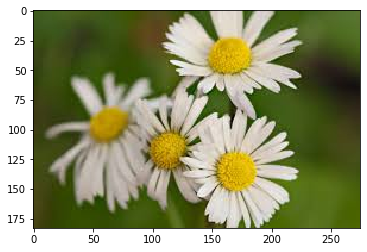

In [3]:
import cv2
img = cv2.imread(imagePath_test+"0a7fdbb3864c168137b43362874822e9.jpg", cv2.IMREAD_COLOR)
print(img.shape)
r,g,b = cv2.split(img) # 機器學習時只要所有輸入時保持相同的顏色輸入即可。
plt.imshow(cv2.merge([b,g,r]))

In [4]:
import os
XX = []
YY = []
for kind in os.listdir(imagePath_train):
    path = imagePath_train+kind+"/"
    for imgFileName in os.listdir(path):
        id = imgFileName[:-4] # the subfilename should be ".jpg", there are 4 chars.
        XX.append(cv2.imread(path+imgFileName, cv2.IMREAD_COLOR))
        YY.append(flower_mapping[kind])

0


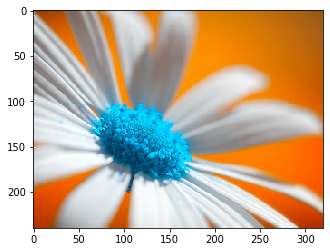

In [5]:
print(YY[0])
plt.imshow(XX[0])

In [6]:
ZZ = {}
for imgFileName in os.listdir(imagePath_test):
    ZZ[imgFileName[:-4]] = cv2.imread(imagePath_test+imgFileName, cv2.IMREAD_COLOR)

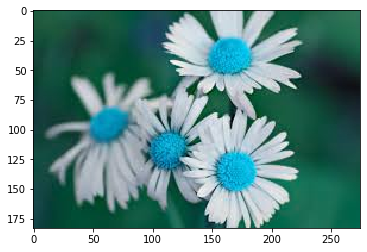

In [7]:
plt.imshow(ZZ['0a7fdbb3864c168137b43362874822e9'])

In [8]:
from PIL import Image
amount = len(XX)
image_new_shape = (128,128,3)
xx = np.empty(shape=(amount,)+image_new_shape, dtype=np.uint8)
for idx in range(amount):
    r,g,b = cv2.split(XX[idx])
    r = np.array(Image.fromarray(r).resize((128,128)))
    g = np.array(Image.fromarray(g).resize((128,128)))
    b = np.array(Image.fromarray(b).resize((128,128)))
    xx[idx] = cv2.merge([r,g,b])

(128, 128, 3)


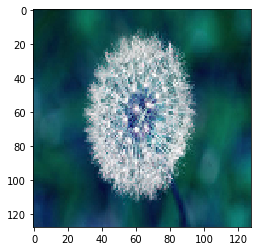

In [9]:
print(xx[501].shape)
plt.imshow(xx[501])

In [10]:
x_train = np.asarray(xx)
y_train = np.asarray(YY)
x_test = ZZ.values()

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [12]:
batch_size = 128 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 5
epochs = 30 # 訓練的 epochs 數量

In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
x_train /= 255
# x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (2823, 128, 128, 3)
2823 train samples


In [14]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

for n in [128, 256]:
    model.add(Conv2D(n, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Conv2D(n, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 128)      

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
#                     validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Epoch 1/30
2823/2823 [==============================] - 725s 257ms/step - loss: 4.0437 - accuracy: 0.2409
Epoch 2/30
2823/2823 [==============================] - 723s 256ms/step - loss: 1.5724 - accuracy: 0.2745
Epoch 3/30
2823/2823 [==============================] - 723s 256ms/step - loss: 1.4967 - accuracy: 0.3270
Epoch 4/30
2823/2823 [==============================] - 729s 258ms/step - loss: 1.4536 - accuracy: 0.3893
Epoch 5/30
2823/2823 [==============================] - 730s 258ms/step - loss: 1.5407 - accuracy: 0.3719
Epoch 6/30
2823/2823 [==============================] - 723s 256ms/step - loss: 1.3140 - accuracy: 0.4704
Epoch 7/30
2823/2823 [==============================] - 724s 256ms/step - loss: 1.3922 - accuracy: 0.4152
Epoch 8/30
2823/2823 [==============================] - 724s 257ms/step - loss: 1.2609 - accuracy: 0.4697
Epoch 9/30
2823/2823 [==============================] - 727s 257ms/step - loss: 1.2744 - accuracy: 0.4924
Epoch 10/30
2823/2823 [=======================

In [16]:
# model.save("2.l2221a9157.h5")
# from keras.models import load_model
# from keras.models import Sequential
# model = Sequential()
# model = load_model("1.h5")


In [17]:
v = list(x_test)
amount = len(x_test)
image_new_shape = (128,128,3)
zz = np.empty(shape=(amount,)+image_new_shape, dtype=np.uint8)
for idx in range(amount):
    r,g,b = cv2.split(v[idx])
    r = np.array(Image.fromarray(r).resize((128,128)))
    g = np.array(Image.fromarray(g).resize((128,128)))
    b = np.array(Image.fromarray(b).resize((128,128)))
    zz[idx] = cv2.merge([r,g,b])

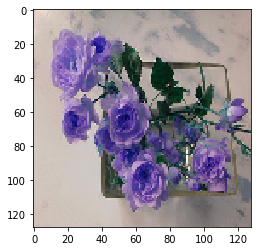

In [18]:
plt.imshow(zz[0])

In [19]:
zz = zz.astype('float32')
zz /= 255
preds = model.predict(zz)

57375ca05323e01ef32b23a57c1b8761 [0.01183439 0.34717086 0.48915488 0.04407689 0.10776295]


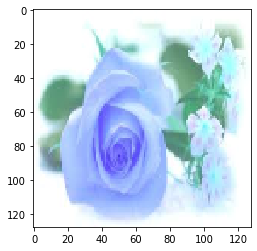

In [35]:
keys = list(ZZ.keys())
print(keys[703], preds[703])
plt.imshow(zz[703])

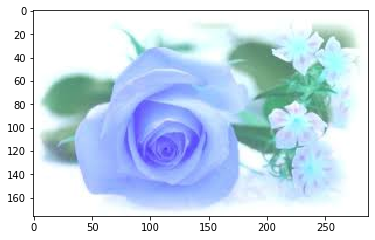

In [37]:
plt.imshow(ZZ[keys[703]])

In [22]:
import numpy as np
import pandas as pd
# prediction = pd.DataFrame(preds, columns=['predictions']).to_csv('prediction.csv')


In [42]:
# model.fit(ddtvx, ddtvy)
# my = model.predict_proba(ddzx)[:,1]
from datetime import datetime
now = datetime.today().strftime('%Y%m%d%H%M%S')
mname = type(model).__name__
print(mname, now, preds)
pd.DataFrame({'name': keys, 'poi': np.argmax(preds, axis=1)}).to_csv('JL_'+mname+'.'+now+'.csv', index=False)

Sequential 20191225045957 [[1.9280560e-05 1.1237770e-07 8.1034666e-01 1.0446281e-07 1.8963380e-01]
 [7.1157497e-11 7.9327483e-06 3.9063391e-10 9.9999201e-01 1.4607653e-09]
 [9.7140207e-07 2.1107025e-09 2.3704523e-02 8.1280987e-06 9.7628641e-01]
 ...
 [1.0000000e+00 3.7595704e-11 2.1545964e-14 2.3855659e-11 2.6639827e-11]
 [9.4860248e-12 3.5947681e-07 2.8117250e-10 9.9971706e-01 2.8260300e-04]
 [6.6968123e-03 5.4100325e-04 6.4790230e-03 3.8918701e-05 9.8624426e-01]]
